In [96]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [97]:
image = cv2.imread('1-Rose.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)


(-0.5, 224.5, 224.5, -0.5)

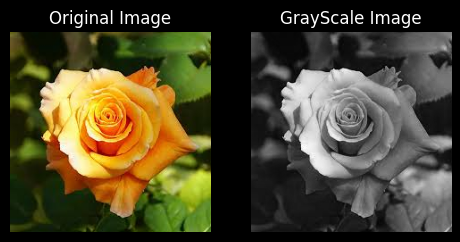

In [98]:
plt.figure(figsize=(15, 5))

# Plot original image
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Plot blurred image
plt.subplot(1, 5, 2)
plt.imshow(gray, cmap='gray')
plt.title('GrayScale Image')
plt.axis('off')



In [99]:
# Print the width and height of the image
height, width, channel = image.shape
print("Image width:", width)
print("Image height:", height)
print("channel:" , channel)

Image width: 225
Image height: 225
channel: 3


FFT good for grayscale

In [100]:
f = np.fft.fft2(gray)

fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

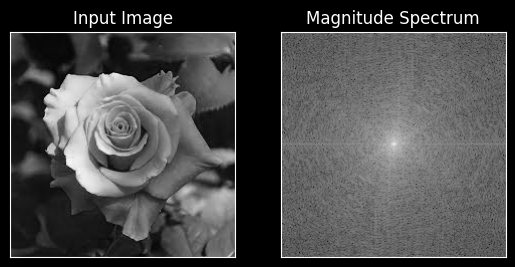

In [101]:
plt.subplot(121),plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [102]:
f_ishift = np.fft.ifftshift(fshift)
image_back = np.fft.ifft2(f_ishift)
image_back = np.abs(image_back)
image_back = np.uint32(image_back)

(-0.5, 224.5, 224.5, -0.5)

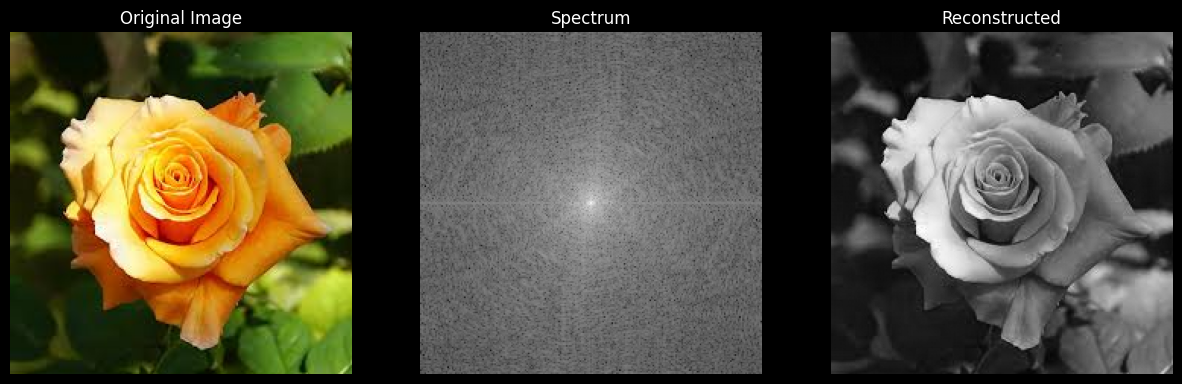

In [103]:
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Spectrum')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gray, cmap='gray')
plt.imshow(image_back,cmap='gray')
plt.title('Reconstructed')
plt.axis('off')


FFT filter

In [104]:
def high_pass_filter(rows, cols, cutoff_freq):
    """Generate an ideal high-pass filter mask."""
    mask = np.ones((rows, cols), np.float32)
    center_row, center_col = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance <= cutoff_freq:
                mask[i, j] = 0
    return mask

In [105]:
def high_pass_filter(rows, cols, cut_off):

    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.ones((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 0
    return mask

In [106]:
def inverse_image(image):
    f_ishift = np.fft.ifftshift(image)
    image_back_filter = np.fft.ifft2(f_ishift)
    image_back_filter = np.abs(image_back_filter)

    return image_back_filter

In [107]:
hpf_mask_30_spec = fshift * high_pass_filter(width, height, 30)
hpf_mask_30 = inverse_image(hpf_mask_30_spec)
hpf_mask_50_spec = fshift * high_pass_filter(width, height, 50)
hpf_mask_50 = inverse_image(hpf_mask_50_spec)
hpf_mask_100_spec = fshift * high_pass_filter(width, height, 100)
hpf_mask_100 = inverse_image(hpf_mask_100_spec)
hpf_mask_1000_spec = fshift * high_pass_filter(width, height, 1000)
hpf_mask_1000 = inverse_image(hpf_mask_1000_spec)


magnitude_spectrum_30 = 20*np.log(np.abs(hpf_mask_30_spec))
magnitude_spectrum_50 = 20*np.log(np.abs(hpf_mask_50_spec))
magnitude_spectrum_100 = 20*np.log(np.abs(hpf_mask_100_spec))
magnitude_spectrum_1000 = 20*np.log(np.abs(hpf_mask_1000_spec))

/tmp/ipykernel_7342/3219022029.py:11: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_30 = 20*np.log(np.abs(hpf_mask_30_spec))
/tmp/ipykernel_7342/3219022029.py:12: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_50 = 20*np.log(np.abs(hpf_mask_50_spec))
/tmp/ipykernel_7342/3219022029.py:13: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_100 = 20*np.log(np.abs(hpf_mask_100_spec))
/tmp/ipykernel_7342/3219022029.py:14: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_1000 = 20*np.log(np.abs(hpf_mask_1000_spec))


In [108]:
#Gaussian Ideal Filter

kernel_size = 21
x = cv2.getGaussianKernel(kernel_size,10)
gaussian_filter = x*x.T
fft_filter= np.fft.fft2(gaussian_filter)
fft_shift = np.fft.fftshift(fft_filter)
mag_spec = np.log(np.abs(fft_shift))
rows, cols = gray.shape
crow, ccol = (rows-kernel_size) // 2, (cols-kernel_size) // 2
d = 30  # Cut-off frequency (adjust as needed)
mask = np.zeros((rows, cols), np.float32)
mask[crow:crow+kernel_size, ccol:ccol+kernel_size] = gaussian_filter
filter_image = fshift * mask
filter_image = inverse_image(filter_image)

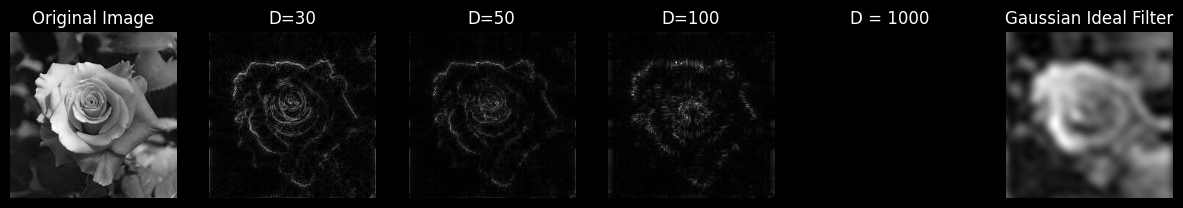

In [109]:
plt.figure(figsize=(15,15))

plt.subplot(1,6,1)
plt.imshow(image_back, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,6,2)
plt.imshow(hpf_mask_30,cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(1,6,3)
plt.imshow(hpf_mask_50,cmap='gray')
plt.title('D=50')
plt.axis('off')

plt.subplot(1,6,4)
plt.imshow(hpf_mask_100,cmap='gray')
plt.title('D=100')
plt.axis('off')

plt.subplot(1,6,5)
plt.imshow(hpf_mask_1000,cmap='gray')
plt.title('D = 1000')
plt.axis('off')

plt.subplot(1,6,6)
plt.imshow(filter_image,cmap='gray')
plt.title('Gaussian Ideal Filter')
plt.axis('off')


plt.show()


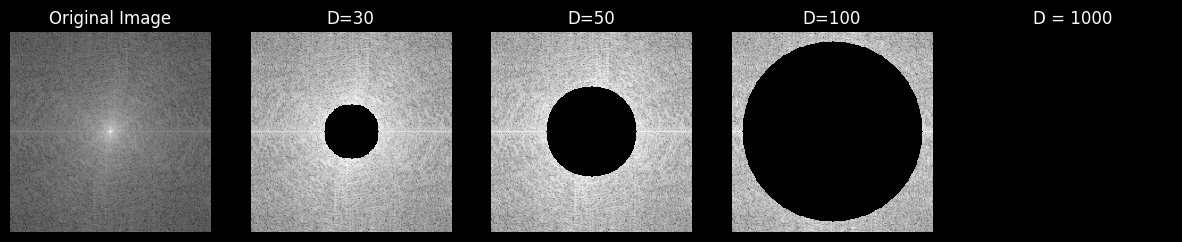

In [110]:
plt.figure(figsize=(15,15))

plt.subplot(1,5,1)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(magnitude_spectrum_30,cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(magnitude_spectrum_50,cmap='gray')
plt.title('D=50')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(magnitude_spectrum_100,cmap='gray')
plt.title('D=100')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(magnitude_spectrum_1000,cmap='gray')
plt.title('D = 1000')
plt.axis('off')


plt.show()


In [111]:
def low_pass_filter(rows, cols, cut_off):

    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.zeros((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 1
    return mask    

In [112]:
lpf_mask_30_spec = fshift * low_pass_filter(width, height, 30)
lpf_mask_30 = inverse_image(lpf_mask_30_spec)

lpf_mask_50_spec = fshift * low_pass_filter(width, height, 50)
lpf_mask_50 = inverse_image(lpf_mask_50_spec)

lpf_mask_100_spec = fshift * low_pass_filter(width, height, 100)
lpf_mask_100 = inverse_image(lpf_mask_100_spec)

lpf_mask_1000_spec = fshift * low_pass_filter(width, height, 1000)
lpf_mask_1000 = inverse_image(lpf_mask_1000_spec)

In [113]:
magnitude_spectrum_30 = 20*np.log(np.abs(lpf_mask_30_spec))
magnitude_spectrum_50 = 20*np.log(np.abs(lpf_mask_50_spec))
magnitude_spectrum_100 = 20*np.log(np.abs(lpf_mask_100_spec))
magnitude_spectrum_1000 = 20*np.log(np.abs(lpf_mask_1000_spec))

/tmp/ipykernel_7342/3811578704.py:1: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_30 = 20*np.log(np.abs(lpf_mask_30_spec))
/tmp/ipykernel_7342/3811578704.py:2: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_50 = 20*np.log(np.abs(lpf_mask_50_spec))
/tmp/ipykernel_7342/3811578704.py:3: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_100 = 20*np.log(np.abs(lpf_mask_100_spec))


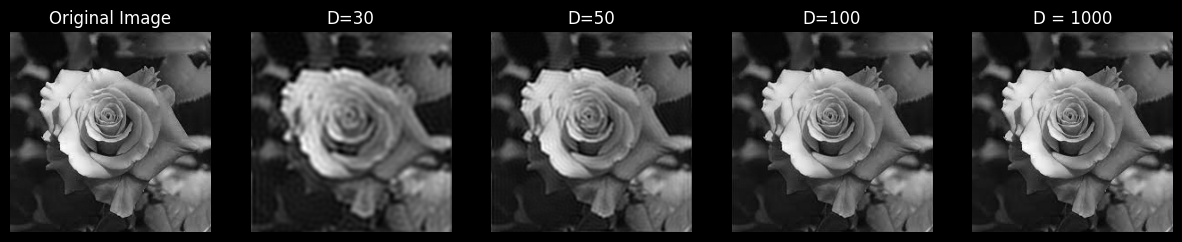

In [114]:
plt.figure(figsize=(15,15))

plt.subplot(1,5,1)
plt.imshow(image_back,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(lpf_mask_30,cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(lpf_mask_50,cmap='gray')
plt.title('D=50')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(lpf_mask_100,cmap='gray')
plt.title('D=100')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(lpf_mask_1000,cmap='gray')
plt.title('D = 1000')
plt.axis('off')


plt.show()


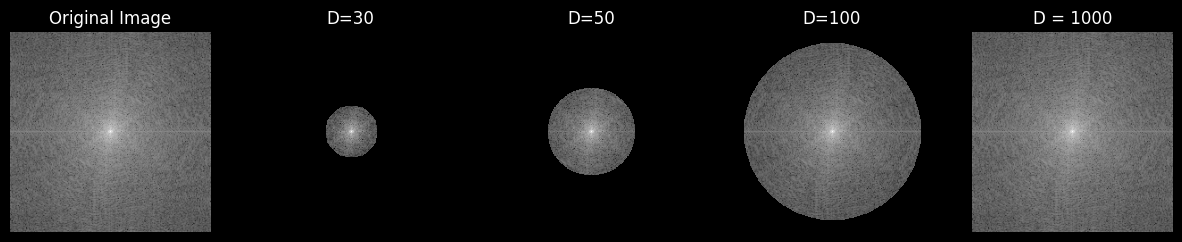

In [115]:
plt.figure(figsize=(15,15))

plt.subplot(1,5,1)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(magnitude_spectrum_30,cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(magnitude_spectrum_50,cmap='gray')
plt.title('D=50')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(magnitude_spectrum_100,cmap='gray')
plt.title('D=100')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(magnitude_spectrum_1000,cmap='gray')
plt.title('D = 1000')
plt.axis('off')


plt.show()
